In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob

In [5]:
df_styles = pd.read_csv("C:/Users/goura/Google Drive/UML/Project/Data_original/styles.csv",error_bad_lines=False)
df_images = pd.read_csv("C:/Users/goura/Google Drive/UML/Project/Data_original/images.csv")


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [6]:
print(df_styles.columns)
print(df_images.columns)

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')
Index(['filename', 'link'], dtype='object')


In [7]:
df_styles.shape
df_images.shape
# Separating the ids from the filename
df_images['id'] = df_images.iloc[:,0].str.split(".", expand = True)[0]


In [8]:
df_styles.columns, df_images.columns

(Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
        'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
       dtype='object'), Index(['filename', 'link', 'id'], dtype='object'))

In [9]:
type(df_styles.loc[0, 'id'])

numpy.int64

In [10]:
df_images['id'] = df_images['id'].apply(lambda x : int(x))

In [11]:
df_all = pd.merge(
    df_styles, 
    df_images, 
    how = 'inner', 
    left_on = "id",
    right_on = 'id'
)
# df_all = df_all.drop(df_all.columns[-1], axis = 1).reset_index()
df_all.iloc[:,:-1]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [19]:
df_all_12 = df_all.iloc[:,:]

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import urllib
import requests
import time
 
 
l, i = len(df_all), 0


for file_name, file_path in zip(df_all_12['filename'], df_all_12['link']):
    file_path_to_store = "./images/" + str(42392)   
    f = open(file_path_to_store, 'wb')
    try:
        f.write(requests.get(file_path).content)
    except:
        f.write("")
    
    f.close()
    
    print (file_name, " saved to ", file_path_to_store)
    i += 1
    
    if i % 15 == 0:
        time.sleep(2)
    print (str(i), "/", str(l))

FileNotFoundError: [Errno 2] No such file or directory: './images/42392'

In [1]:
img_data, j = [], -1
for i in glob.glob("./Project/images/*.jpg"):
    j += 1
    if j == 2:
        break
    temp = cv2.imread(i)
#     newimg = cv2.resize(temp,(int(80),int(768)))
    img_data.append(temp.flatten())

img_data = np.array(img_data)

NameError: name 'glob' is not defined

In [4]:
img_data.shape

(300, 14400)

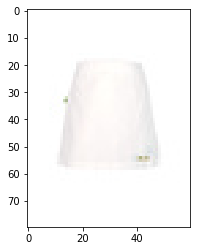

In [5]:
plt.imshow(img_data[0].reshape((80, 60,3)))

In [6]:
from sklearn.decomposition import PCA

In [7]:
n = 0.8
pca = PCA(n_components = n).fit(img_data)

In [8]:
img_data.shape

(300, 14400)

In [9]:
pca.components_

array([[-6.95330860e-06, -2.73350635e-06, -2.73350635e-06, ...,
        -8.33306223e-06, -3.96507024e-06, -1.05213831e-05],
       [ 1.31179039e-06, -2.61914851e-06, -2.61914851e-06, ...,
         3.03381533e-06, -3.33287918e-06,  2.83583278e-06],
       [ 1.06299848e-06, -2.56726014e-06, -2.56726014e-06, ...,
        -4.48482423e-05, -6.35257974e-06, -4.80496134e-05],
       ...,
       [ 4.66741167e-06,  4.07577792e-05,  4.07577792e-05, ...,
         9.52051043e-05,  3.85640616e-05,  1.01820332e-04],
       [ 3.66837962e-05,  2.65734730e-06,  2.65734730e-06, ...,
        -3.30228895e-06,  2.48713889e-05, -5.14676997e-06],
       [ 3.80248753e-05,  4.34178440e-06,  4.34178440e-06, ...,
        -2.69564892e-05,  3.45797879e-05, -2.25014976e-05]])

In [10]:
# PCA COMPONENTS
# fig, axes = plt.subplots(n, n,figsize=(80,60), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(pca.components_[i].reshape(80,60),cmap='gray')

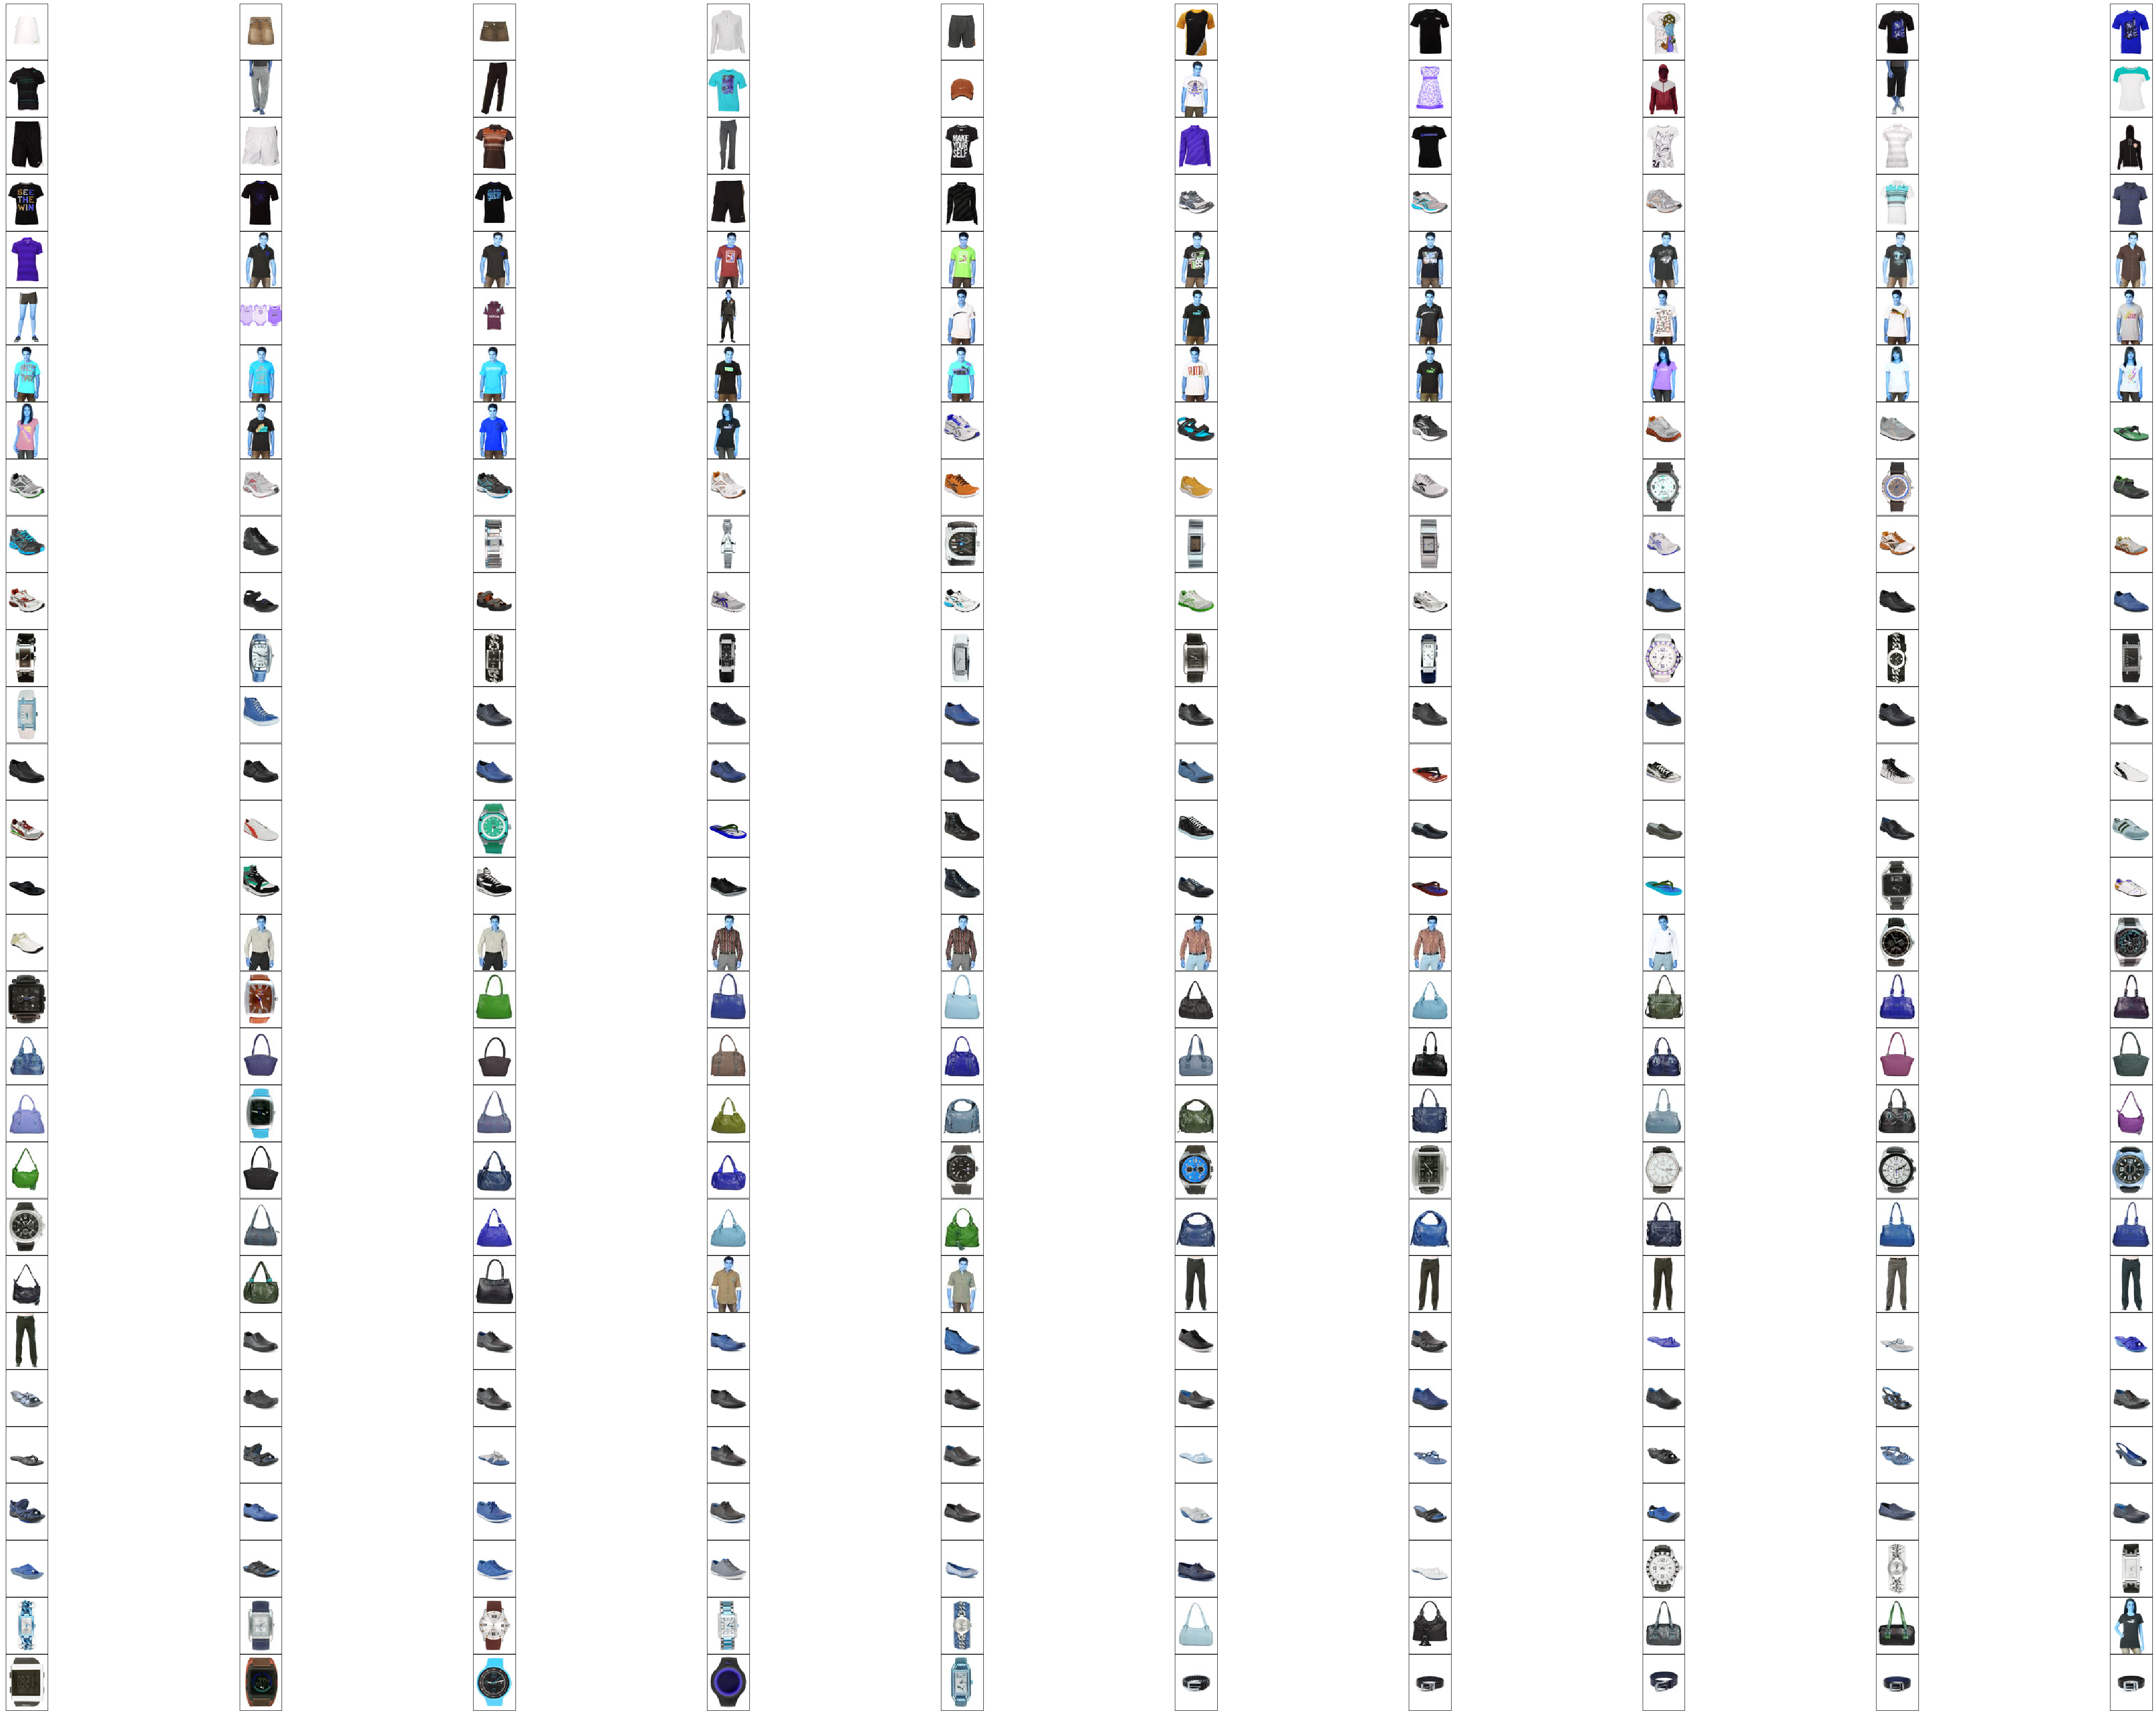

In [11]:
a = pca.inverse_transform(pca.transform(img_data))

fig, axes = plt.subplots(30, 10,figsize=(80,60), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i].reshape(80, 60,3),cmap='gray')

In [22]:
q[i].reshape(80,60,3).astype('uint8')
q = np.zeros(shape = a.shape)
import math
for i in range(len(a)):
    for j in range(len(a[i])):
        q[i][j] = int(math.floor(a[i][j]))

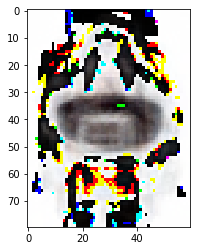

In [23]:
# fig, axes = plt.subplots(30, 10,figsize=(80, 60), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(q[i].reshape(80,60,3).astype('uint8'),cmap='gray')
#     ax.savefig("1.jpg")   

for i in range(len(q)):
    cv2.imwrite(str(i)+".jpg", q[i].reshape(80,60,3).astype('uint8'))
    plt.imshow(q[i].reshape(80,60,3).astype('uint8'))